## Stock prediction using a saved model

#### Here we can resuse the Recurrent Neural Network(RNN) model for the prediction of HDFC stock price. First we import the necessary libraries and the training and testing data.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
dataset_train=pd.read_excel('C:/Users/aksha/Desktop/ai/datasets/HDFC_train.xlsx')
dataset_test=pd.read_excel('C:/Users/aksha/Desktop/ai/datasets/HDFC_test.xlsx')
dataset_train.shape

(2185, 7)

In [6]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2185 entries, 0 to 2184
Data columns (total 7 columns):
Date            2185 non-null datetime64[ns]
Open            2185 non-null float64
High            2185 non-null float64
Low             2185 non-null float64
Close*          2185 non-null float64
Adj. close**    2185 non-null float64
Volume          2185 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 119.6 KB


#### There are no null values hence we move on with our anaysis.

#### We choose only the Open values for our analysis.

In [7]:
training_set = dataset_train.iloc[:, 1:2].values
training_set

array([[2411.95],
       [2426.  ],
       [2428.35],
       ...,
       [ 417.09],
       [ 418.  ],
       [ 418.65]])

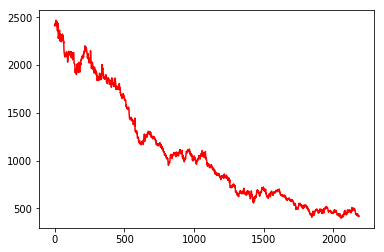

In [8]:
plt.plot(training_set, color = 'red', label = ' Stock Price')

In [9]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[0.97199353],
       [0.97877786],
       [0.9799126 ],
       ...,
       [0.00873512],
       [0.00917453],
       [0.0094884 ]])

####  Creating a data structure with 60 timesteps and 1 output

In [10]:
X_train = []
y_train = []
for i in range(60, 2185):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
y_train

array([0.91793621, 0.90296724, 0.90320867, ..., 0.00873512, 0.00917453,
       0.0094884 ])

In [11]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(2125, 60, 1)

In [12]:
#Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


### Here we import the already saved model using pickle

In [13]:
import pickle
filename = 'finalized_model.sav'
regressor = pickle.load(open(filename, 'rb'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


#### Making the predictions and visualising the results

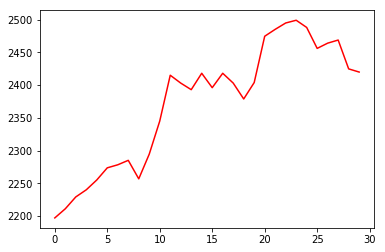

In [14]:
real_stock_price = dataset_test.iloc[:, 1:2].values
plt.plot(real_stock_price, color = 'red', label = 'Real Stock Price')

In [15]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 90):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
inputs.shape

(90, 1)

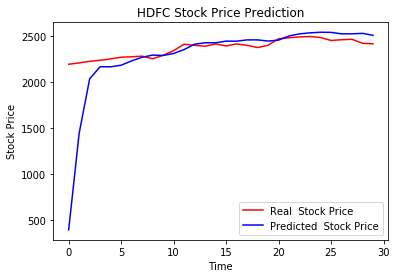

In [16]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real  Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted  Stock Price')
plt.title('HDFC Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()